Installing Python packages for ML

In [2]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=725c96c6986ac6c4e3ec58d34158595fdf0f19221ef81457e39732754c77f8d3
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [3]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [7]:
#uploading file from PC to Colab
from google.colab import files
files.upload() #you can see uploaded file in the file icon of the left panel of this page

Saving dhaka homeprices.csv to dhaka homeprices.csv


{'dhaka homeprices.csv': b'area,price\r\n2600,55000\r\n3000,56500\r\n3200,61000\r\n3600,68000\r\n4000,72000\r\n5000,71000\r\n2500,40000\r\n2700,38000\r\n1200,17000\r\n5000,100000\r\n'}

In [8]:
df = pd.read_csv('dhaka homeprices.csv')

In [9]:
df

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000
5,5000,71000
6,2500,40000
7,2700,38000
8,1200,17000
9,5000,100000


In [10]:
df.head() #by default head() shows only first 5 rows

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000


In [11]:
df.head(3) #specify no. of rows

,area,price
0,2600,55000
1,3000,56500
2,3200,61000


In [12]:
df.shape #shows no. rows x column

(10, 2)

In [13]:
df.isnull().any() #returns True if there is null value otherwise False

area     False
price    False
dtype: bool

In [14]:
df.isnull().sum() #returns Total no. of null values of each column

area     0
price    0
dtype: int64

In [15]:
x = df[['area']]
y = df['price']

In [16]:
x

,area
0,2600
1,3000
2,3200
3,3600
4,4000
5,5000
6,2500
7,2700
8,1200
9,5000


In [17]:
y

0     55000
1     56500
2     61000
3     68000
4     72000
5     71000
6     40000
7     38000
8     17000
9    100000
Name: price, dtype: int64

Visualization

Text(0.5, 1.0, 'Home prices in Dhaka')

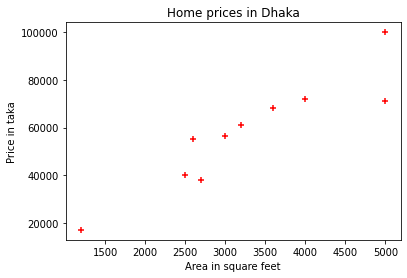

In [21]:
plt.scatter(df['area'],df['price'], marker = '+', color = 'r') #using matplotlib() library
plt.xlabel('Area in square feet')
plt.ylabel('Price in taka')
plt.title('Home prices in Dhaka')

In [24]:
#Splitting data as training and testing which are mutually exclusive
#we want 30% data for testing randomly
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = .30, random_state=1)

In [25]:
xtrain

,area
4,4000
0,2600
3,3600
1,3000
7,2700
8,1200
5,5000


In [26]:
xtest

,area
2,3200
9,5000
6,2500


In [29]:
ytrain

4    72000
0    55000
3    68000
1    56500
7    38000
8    17000
5    71000
Name: price, dtype: int64

In [32]:
ytest

2     61000
9    100000
6     40000
Name: price, dtype: int64

In [27]:
#Apply linear regression
from sklearn.linear_model import LinearRegression

In [28]:
#linear regression object creation
reg = LinearRegression()

In [30]:
#fittin data or model execution
reg.fit(xtrain,ytrain)

LinearRegression()

In [31]:
#Predicting
#predicted value of test data
reg.predict(xtest)

array([54577.95521897, 81852.07441554, 43971.35330919])

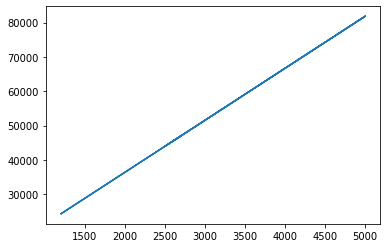

In [33]:
#drawing best fit line
plt.plot(df.area, reg.predict(df[['area']]))

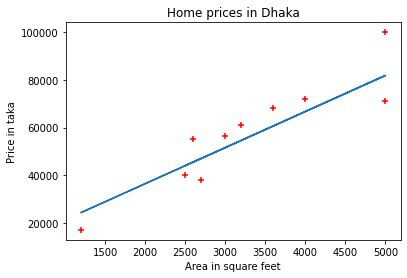

In [34]:
#best fit line with previous codes to show details
plt.scatter(df['area'],df['price'], marker = '+', color = 'r') #using matplotlib() library
plt.xlabel('Area in square feet')
plt.ylabel('Price in taka')
plt.title('Home prices in Dhaka')
plt.plot(df.area, reg.predict(df[['area']]))

In [39]:
#predicting price for any value of size
reg.predict([[3900]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([65184.55712875])

In [40]:
# y = mx + c
reg.coef_

array([15.15228844])

In [41]:
reg.intercept_

6090.632202831752

In [42]:
#testing formula
y = 15.15228844*3900 + 6090.632202831752

In [43]:
y #same value of y as coding line [39]

65184.55711883175